In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
A = np.eye(5)
A

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [3]:
path = 'D:/python 代码/Coursera-ML-AndrewNg-Notes-master (1)/Coursera-ML-AndrewNg-Notes-master/code/ex1-linear regression/ex1data1.txt'
data = pd.read_csv(path,header=None,names=['population','profit'],engine='python')
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


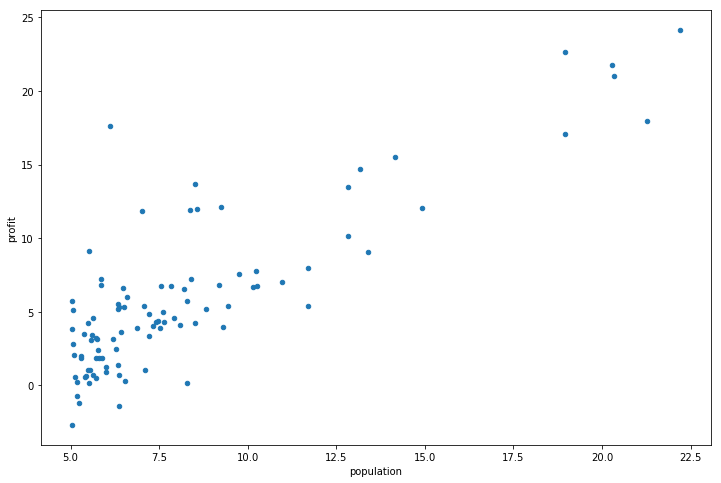

In [7]:
data.plot(kind='scatter',x='population',y='profit',figsize=(12,8))
plt.show()

In [8]:
def computeCost(X,y,theta):
    inner = np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2 * len(X))

In [9]:
def computeCost2(X,y,theta):
    inner = np.power((X*theta.T-y),2)
    return np.sum(inner)/(2*len(X))

In [10]:
data.insert(0,'Ones',1)

In [11]:
data.head()

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [12]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [13]:
X.head()

,Ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [14]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [15]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0])) #theta 是一个(1,2)矩阵

In [16]:
theta

matrix([[0, 0]])

In [17]:
X.shape,theta.shape,y.shape

((97, 2), (1, 2), (97, 1))

In [18]:
computeCost(X,y,theta)

32.072733877455676

In [19]:
computeCost2(X,y,theta)

32.072733877455676

In [20]:
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T)-y
        
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j] - ((alpha/len(X)*np.sum(term)))
        
        theta = temp
        cost[i] = computeCost(X,y,theta)
    return theta,cost

In [21]:
temp = np.matrix(np.zeros(theta.shape))
temp

matrix([[ 0.,  0.]])

In [23]:
parameters = int(theta.ravel().shape[1])
parameters

2

In [24]:
cost = np.zeros(8)
cost

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [25]:
alpha = 0.01
iters = 1000

In [26]:
g,cost = gradientDescent(X,y,theta, alpha ,iters)
cost

array([ 6.73719046,  5.93159357,  5.90115471,  5.89522859,  5.89009494,
        5.88500416,  5.87993248,  5.87487909,  5.86984391,  5.86482687,
        5.85982789,  5.85484692,  5.84988389,  5.84493874,  5.8400114 ,
        5.83510181,  5.8302099 ,  5.82533562,  5.82047889,  5.81563965,
        5.81081784,  5.8060134 ,  5.80122627,  5.79645638,  5.79170367,
        5.78696808,  5.78224955,  5.77754801,  5.77286341,  5.76819568,
        5.76354477,  5.75891061,  5.75429313,  5.7496923 ,  5.74510803,
        5.74054027,  5.73598897,  5.73145406,  5.72693549,  5.72243319,
        5.71794711,  5.71347718,  5.70902336,  5.70458558,  5.70016379,
        5.69575792,  5.69136792,  5.68699373,  5.6826353 ,  5.67829257,
        5.67396548,  5.66965398,  5.665358  ,  5.6610775 ,  5.65681242,
        5.6525627 ,  5.64832829,  5.64410913,  5.63990517,  5.63571635,
        5.63154261,  5.62738391,  5.6232402 ,  5.6191114 ,  5.61499748,
        5.61089837,  5.60681403,  5.60274441,  5.59868944,  5.59

In [27]:
computeCost(X,y,g)

4.5159555030789118

In [29]:
g

matrix([[-3.24140214,  1.1272942 ]])

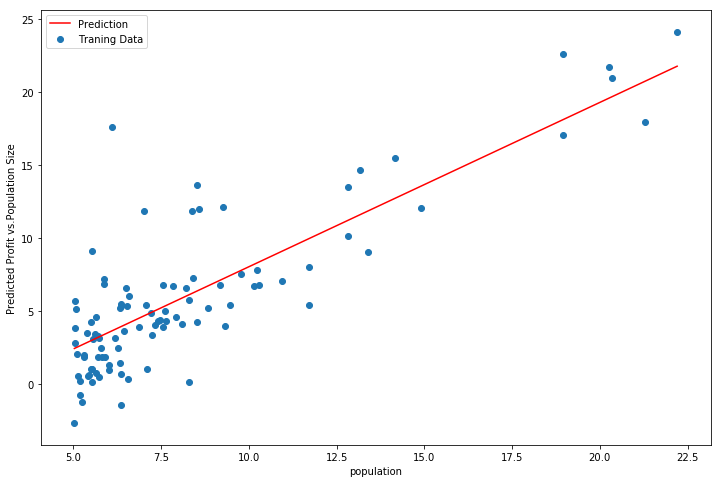

In [28]:
x = np.linspace(data.population.min(),data.population.max(),50) #
f = g[0,0] + (g[0,1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('population')
ax.set_ylabel('Predicted Profit vs.Population Size')
plt.show()

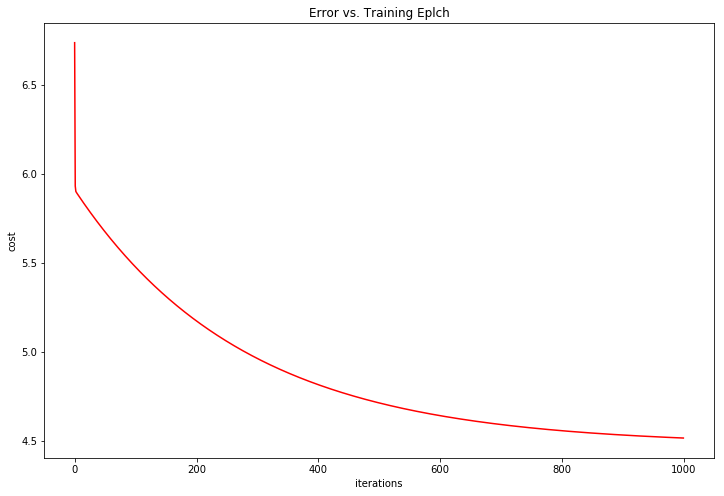

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title('Error vs. Training Eplch')
plt.show()


In [31]:
theta

matrix([[0, 0]])

In [32]:
path =  'D:/python 代码/Coursera-ML-AndrewNg-Notes-master (1)/Coursera-ML-AndrewNg-Notes-master/code/ex1-linear regression/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['size', 'badroom', 'price'],engine='python')
data2.head()

,size,badroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [33]:
data2 = (data2 - data2.mean())/data2.std()
data2.head()

,size,badroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [34]:
data2.insert(0,'ones',1)
data2.head()

,ones,size,badroom,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [35]:
cols1 = data2.shape[1]
X2 = data2.iloc[:,0:cols1-1]
y2 = data2.iloc[:,cols1-1:cols1]

In [36]:
X2.head()

,ones,size,badroom
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [37]:
y2.head()

,price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [38]:
X2= np.matrix(X2.values)
y2= np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

In [39]:
theta2

matrix([[0, 0, 0]])

In [40]:
computeCost(X2,y2,theta2)

0.48936170212765967

In [41]:
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
computeCost(X2,y2,g2)

0.13070336960771892

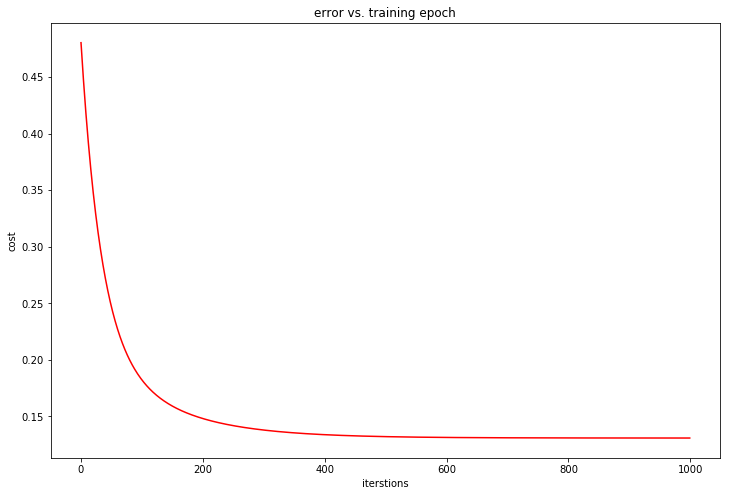

In [42]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(np.arange(iters),cost2,'r')
ax.set_xlabel('iterstions')
ax.set_ylabel('cost')
ax.set_title('error vs. training epoch')
plt.show()

In [43]:
theta2

matrix([[0, 0, 0]])

In [44]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
x = np.array(X[:,1].A1)
x

array([  6.1101,   5.5277,   8.5186,   7.0032,   5.8598,   8.3829,
         7.4764,   8.5781,   6.4862,   5.0546,   5.7107,  14.164 ,
         5.734 ,   8.4084,   5.6407,   5.3794,   6.3654,   5.1301,
         6.4296,   7.0708,   6.1891,  20.27  ,   5.4901,   6.3261,
         5.5649,  18.945 ,  12.828 ,  10.957 ,  13.176 ,  22.203 ,
         5.2524,   6.5894,   9.2482,   5.8918,   8.2111,   7.9334,
         8.0959,   5.6063,  12.836 ,   6.3534,   5.4069,   6.8825,
        11.708 ,   5.7737,   7.8247,   7.0931,   5.0702,   5.8014,
        11.7   ,   5.5416,   7.5402,   5.3077,   7.4239,   7.6031,
         6.3328,   6.3589,   6.2742,   5.6397,   9.3102,   9.4536,
         8.8254,   5.1793,  21.279 ,  14.908 ,  18.959 ,   7.2182,
         8.2951,  10.236 ,   5.4994,  20.341 ,  10.136 ,   7.3345,
         6.0062,   7.2259,   5.0269,   6.5479,   7.5386,   5.0365,
        10.274 ,   5.1077,   5.7292,   5.1884,   6.3557,   9.7687,
         6.5159,   8.5172,   9.1802,   6.002 ,   5.5204,   5.0

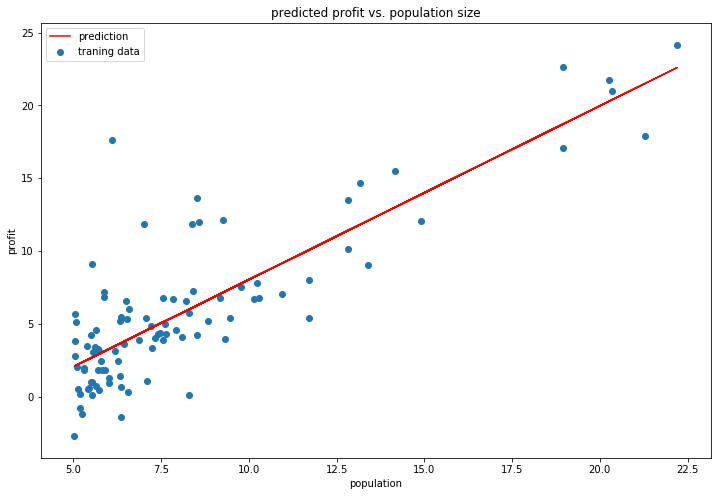

In [46]:
f = model.predict(X).flatten()

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label = 'prediction')
ax.scatter(data.population,data.profit,label='traning data')
ax.legend(loc=2)
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.set_title('predicted profit vs. population size')
plt.show()

In [50]:
def normalEqn(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [51]:
final_theta2 = normalEqn(X,y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])